In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

## Classification

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv('Iris.csv')
print(data.head())
data = data.to_numpy()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
X = data[:,1:5]
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

In [7]:
Y = data[:,5:]
Y[:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# test_size=0.3 Chỉ định rằng 30% dữ liệu sẽ được dùng làm tập kiểm tra, và 80% còn lại sẽ dùng cho tập huấn luyện.
# Ví dụ: Nếu bạn có 100 mẫu, thì 80 mẫu sẽ vào tập huấn luyện và 20 mẫu sẽ vào tập kiểm tra.
# random_state là một giá trị cố định để đảm bảo quá trình chia dữ liệu luôn giống nhau mỗi khi chạy mã.
# stratify=Y giúp đảm bảo rằng tỷ lệ các lớp (nhãn) trong tập huấn luyện và tập kiểm tra là giống nhau.
# Điều này quan trọng nếu dữ liệu của bạn có sự phân bố không đều giữa các lớp. 
# Ví dụ, nếu có 60% mẫu thuộc lớp A và 40% thuộc lớp B, thì stratify=Y sẽ đảm bảo rằng tỷ lệ này vẫn được duy trì trong cả hai tập.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,Y_train.ravel())

KNeighborsClassifier(n_neighbors=9)

In [268]:
#classifier.kneighbors(X_test)

In [11]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [286]:
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(Y_test, y_pred),2))

0.97


In [2]:
print(90*90*32)

777600


In [287]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [288]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculating F1-score for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.ravel())
    pred_i = knn.predict(X_test)
    error.append(f1_score(Y_test, pred_i, average='weighted'))

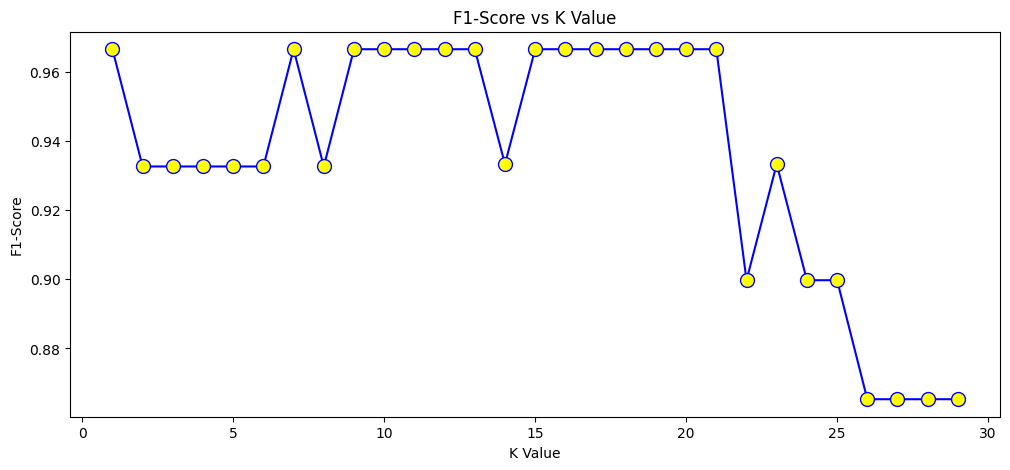

In [289]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('F1-Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1-Score')
plt.show()

In [290]:
from sklearn.metrics import precision_score
error = []
# Calculating F1-score for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train.ravel())
    pred_i = knn.predict(X_test)
    error.append(precision_score(Y_test, pred_i, average='weighted'))

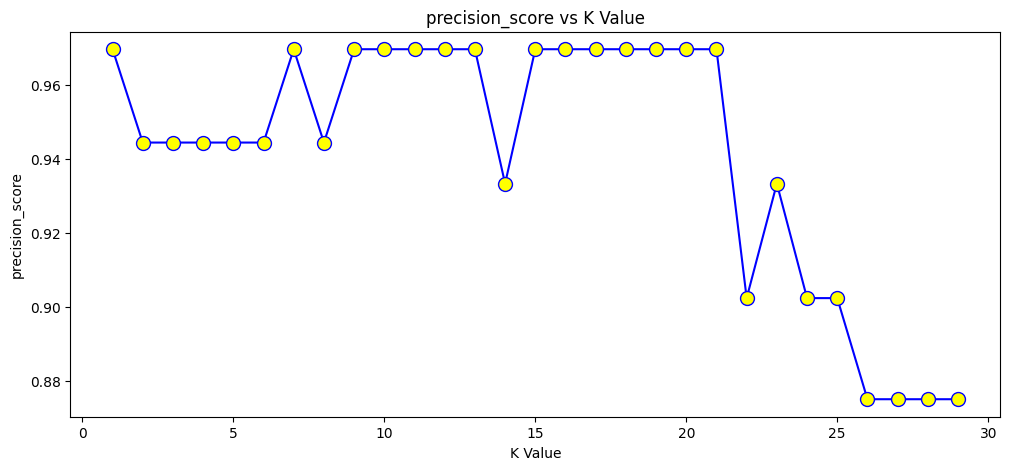

In [291]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('precision_score vs K Value')
plt.xlabel('K Value')
plt.ylabel('precision_score')
plt.show()

## Regression

In [343]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [344]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y.astype(np.int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [346]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [347]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [348]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
knn_regressor = KNeighborsRegressor(n_neighbors=9)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [364]:
y_pred = knn_regressor.predict(X_test)
y_pred

array([1.11111111, 0.        , 2.        , 1.22222222, 1.11111111,
       0.        , 1.        , 2.        , 1.33333333, 1.        ,
       1.88888889, 0.        , 0.        , 0.        , 0.        ,
       1.22222222, 2.        , 1.        , 1.        , 2.        ,
       0.        , 1.66666667, 0.        , 2.        , 2.        ,
       2.        , 1.77777778, 2.        , 0.        , 0.        ])

In [365]:
score = r2_score(y_test, y_pred)
print(f'R2 Score: {score:.2f}')

R2 Score: 0.98


In [351]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(np.mean(score))

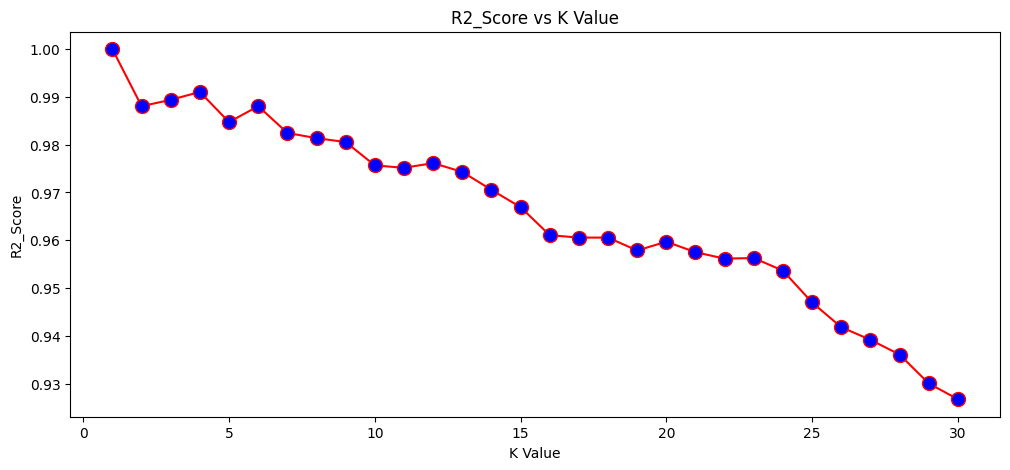

In [355]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 31), scores, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('R2_Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('R2_Score')
plt.show()